In [1]:
import time
start = time.time()

In [2]:
import polars as pl
import hvplot.polars
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
%%time
df0 = pl.read_csv('data/src/heizung*.csv',columns=['time','Channel','Wert'],try_parse_dates=True).sort(by='time')
df0

CPU times: total: 14.5 s
Wall time: 3.93 s


time,Channel,Wert
str,str,f64
"""2023-01-01 00:00:58.617""","""getTempA""",12.5
"""2023-01-01 00:00:58.618""","""getTempAged""",12.8
"""2023-01-01 00:00:58.618""","""getTempAtp""",12.5
"""2023-01-01 00:00:58.619""","""getTempWWist""",22.700001
"""2023-01-01 00:00:58.62""","""getTempAbgas""",19.0
…,…,…
"""2023-12-31 23:59:55.886""","""getPumpeDrehzahlIntern""",0.0
"""2023-12-31 23:59:55.886""","""getStatusStoerung""",0.0
"""2023-12-31 23:59:55.887""","""getNeigungM1""",0.6


In [9]:
#df0.write_parquet(file='data/src/test.parquet',compression='gzip')
#pl.read_parquet('data/src/test.parquet')


In [4]:
#%%time
# create a new column with the correct time format of length 23 (YYYY-MM-DD HH:MM:SS.XXX)
#df0 = df0.with_columns(pl.when(pl.col('time').str.len_chars()==19)
#                 .then(pl.col('time').str.join('.').str.pad_end(23,'0'))
#                 .otherwise(pl.col('time').str.pad_end(23,'0'))
#                 .alias('time2')
#                 )
#df0

In [5]:
%%time
# convert string to type datetime
df0 = df0.with_columns(pl.col("time").str.to_datetime('%Y-%m-%d %H:%M:%S%.3f'))
df0

CPU times: total: 4.75 s
Wall time: 5.03 s


time,Channel,Wert
datetime[ms],str,f64
2023-01-01 00:00:58.617,"""getTempA""",12.5
2023-01-01 00:00:58.618,"""getTempAged""",12.8
2023-01-01 00:00:58.618,"""getTempAtp""",12.5
2023-01-01 00:00:58.619,"""getTempWWist""",22.700001
2023-01-01 00:00:58.620,"""getTempAbgas""",19.0
…,…,…
2023-12-31 23:59:55.886,"""getPumpeDrehzahlIntern""",0.0
2023-12-31 23:59:55.886,"""getStatusStoerung""",0.0
2023-12-31 23:59:55.887,"""getNeigungM1""",0.6


In [6]:
# rounding values to 1 minute
df0 = df0.with_columns(pl.col('time').dt.round('1m'))
df0

time,Channel,Wert
datetime[ms],str,f64
2023-01-01 00:01:00,"""getTempA""",12.5
2023-01-01 00:01:00,"""getTempAged""",12.8
2023-01-01 00:01:00,"""getTempAtp""",12.5
2023-01-01 00:01:00,"""getTempWWist""",22.700001
2023-01-01 00:01:00,"""getTempAbgas""",19.0
…,…,…
2024-01-01 00:00:00,"""getPumpeDrehzahlIntern""",0.0
2024-01-01 00:00:00,"""getStatusStoerung""",0.0
2024-01-01 00:00:00,"""getNeigungM1""",0.6


In [7]:
%%time
# change channel values to columns
df1 = df0.pivot(index='time', on='Channel', values='Wert',aggregate_function='mean')
# fiilter year
df1 = df1.filter(pl.col("time").dt.year() < 2024)
df1

CPU times: total: 16.6 s
Wall time: 6.61 s


time,getTempA,getTempAged,getTempAtp,getTempWWist,getTempAbgas,getTempWWsoll,getTempKist,getTempKsoll,getTempKOffset,getTempKtp,getTempVListM1,getTempRL17A,getStatusFrostM1,getTempRaumNorSollM1,getTempRaumRedSollM1,getBrennerStarts,getBrennerStunden1,getLeistungIst,getVolStrom,getPumpeDrehzahlIntern,getPumpeStatusIntern,getStatusStoerung,getNeigungM1,getNiveauM1,getTempVLsollM1
datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2023-01-01 00:01:00,12.5,12.8,12.5,22.700001,19.0,50.0,19.0,5.0,20.0,19.0,19.0,19.0,2.0,17.0,3.0,9318.0,20008.796875,0.0,0.0,0.0,0.0,0.0,null,null,null
2023-01-01 00:02:00,12.5,12.8,12.5,22.700001,19.0,50.0,19.0,5.0,20.0,19.0,19.0,19.0,2.0,17.0,3.0,9318.0,20008.796875,0.0,1.0,0.0,0.0,0.0,null,null,null
2023-01-01 00:03:00,12.6,12.8,12.5,22.799999,19.0,50.0,19.0,5.0,20.0,19.0,19.0,19.0,2.0,17.0,3.0,9318.0,20008.796875,0.0,0.0,0.0,0.0,0.0,null,null,null
2023-01-01 00:04:00,12.6,12.8,12.5,22.700001,19.0,50.0,19.0,5.0,20.0,19.0,19.0,19.0,2.0,17.0,3.0,9318.0,20008.796875,0.0,0.0,0.0,0.0,0.0,null,null,null
2023-01-01 00:05:00,12.6,12.8,12.5,22.700001,19.0,50.0,19.0,5.0,20.0,19.0,19.0,19.0,2.0,17.0,3.0,9318.0,20008.796875,0.0,0.0,0.0,0.0,0.0,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2023-12-31 23:55:00,6.7,7.7,6.7,24.200001,21.5,50.0,21.0,5.0,20.0,21.0,21.0,21.5,2.0,18.0,3.0,10259.0,21548.449219,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0
2023-12-31 23:56:00,6.7,7.7,6.7,24.200001,21.5,50.0,21.0,5.0,20.0,21.0,21.0,21.5,2.0,18.0,3.0,10259.0,21548.449219,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0
2023-12-31 23:57:00,6.7,7.7,6.7,24.200001,21.5,50.0,21.0,5.0,20.0,21.0,21.0,21.5,2.0,18.0,3.0,10259.0,21548.449219,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0


In [8]:
df1.null_count()

time,getTempA,getTempAged,getTempAtp,getTempWWist,getTempAbgas,getTempWWsoll,getTempKist,getTempKsoll,getTempKOffset,getTempKtp,getTempVListM1,getTempRL17A,getStatusFrostM1,getTempRaumNorSollM1,getTempRaumRedSollM1,getBrennerStarts,getBrennerStunden1,getLeistungIst,getVolStrom,getPumpeDrehzahlIntern,getPumpeStatusIntern,getStatusStoerung,getNeigungM1,getNiveauM1,getTempVLsollM1
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,90,91,91,91,95,92,97,97,97,96,96,94,95,94,94,95,96,97,97,99,97,100,37920,37920,37920


In [9]:
# Upsample to fill missing dates with null values
df2 = df1.upsample(time_column="time", every="1m")
df2

time,getTempA,getTempAged,getTempAtp,getTempWWist,getTempAbgas,getTempWWsoll,getTempKist,getTempKsoll,getTempKOffset,getTempKtp,getTempVListM1,getTempRL17A,getStatusFrostM1,getTempRaumNorSollM1,getTempRaumRedSollM1,getBrennerStarts,getBrennerStunden1,getLeistungIst,getVolStrom,getPumpeDrehzahlIntern,getPumpeStatusIntern,getStatusStoerung,getNeigungM1,getNiveauM1,getTempVLsollM1
datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2023-01-01 00:01:00,12.5,12.8,12.5,22.700001,19.0,50.0,19.0,5.0,20.0,19.0,19.0,19.0,2.0,17.0,3.0,9318.0,20008.796875,0.0,0.0,0.0,0.0,0.0,null,null,null
2023-01-01 00:02:00,12.5,12.8,12.5,22.700001,19.0,50.0,19.0,5.0,20.0,19.0,19.0,19.0,2.0,17.0,3.0,9318.0,20008.796875,0.0,1.0,0.0,0.0,0.0,null,null,null
2023-01-01 00:03:00,12.6,12.8,12.5,22.799999,19.0,50.0,19.0,5.0,20.0,19.0,19.0,19.0,2.0,17.0,3.0,9318.0,20008.796875,0.0,0.0,0.0,0.0,0.0,null,null,null
2023-01-01 00:04:00,12.6,12.8,12.5,22.700001,19.0,50.0,19.0,5.0,20.0,19.0,19.0,19.0,2.0,17.0,3.0,9318.0,20008.796875,0.0,0.0,0.0,0.0,0.0,null,null,null
2023-01-01 00:05:00,12.6,12.8,12.5,22.700001,19.0,50.0,19.0,5.0,20.0,19.0,19.0,19.0,2.0,17.0,3.0,9318.0,20008.796875,0.0,0.0,0.0,0.0,0.0,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2023-12-31 23:55:00,6.7,7.7,6.7,24.200001,21.5,50.0,21.0,5.0,20.0,21.0,21.0,21.5,2.0,18.0,3.0,10259.0,21548.449219,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0
2023-12-31 23:56:00,6.7,7.7,6.7,24.200001,21.5,50.0,21.0,5.0,20.0,21.0,21.0,21.5,2.0,18.0,3.0,10259.0,21548.449219,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0
2023-12-31 23:57:00,6.7,7.7,6.7,24.200001,21.5,50.0,21.0,5.0,20.0,21.0,21.0,21.5,2.0,18.0,3.0,10259.0,21548.449219,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0


In [10]:
df2.null_count()

time,getTempA,getTempAged,getTempAtp,getTempWWist,getTempAbgas,getTempWWsoll,getTempKist,getTempKsoll,getTempKOffset,getTempKtp,getTempVListM1,getTempRL17A,getStatusFrostM1,getTempRaumNorSollM1,getTempRaumRedSollM1,getBrennerStarts,getBrennerStunden1,getLeistungIst,getVolStrom,getPumpeDrehzahlIntern,getPumpeStatusIntern,getStatusStoerung,getNeigungM1,getNiveauM1,getTempVLsollM1
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,8012,8013,8013,8013,8017,8014,8019,8019,8019,8018,8018,8016,8017,8016,8016,8017,8018,8019,8019,8021,8019,8022,45842,45842,45842


CPU times: total: 766 ms
Wall time: 913 ms


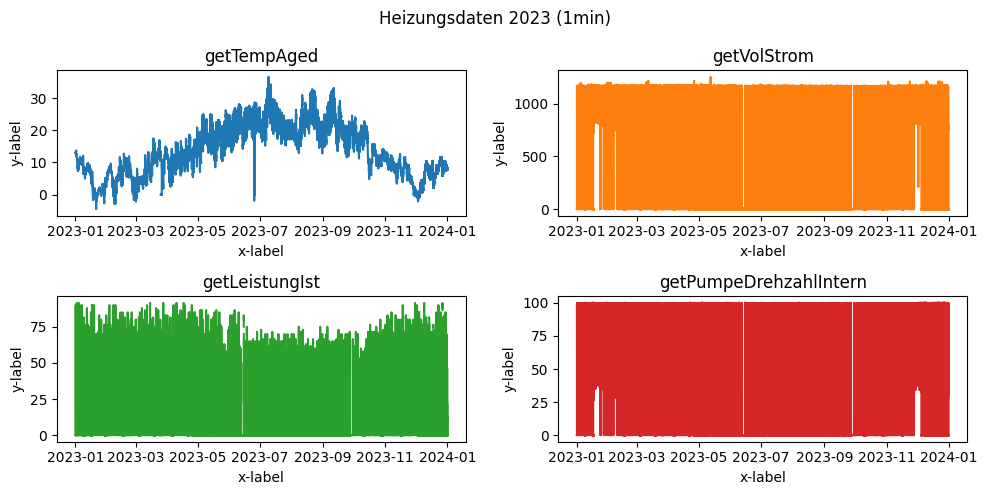

In [11]:
%%time
x = df2['time']
fig, axs = plt.subplots(2,2,figsize=(10, 5))
y = ['getTempAged','getVolStrom','getLeistungIst','getPumpeDrehzahlIntern']
color = ['blue','orange','green','red']
for i in range(2):
    for j in range(2):
        # convert ij from binary to integer
        index = int(str(i)+str(j), 2)
        axs[i,j].plot(x, df2[y[index]],'tab:'+color[index])
        axs[i,j].set_title(y[index])


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

plt.suptitle('Heizungsdaten 2023 (1min)')
plt.tight_layout()

In [12]:
df2[y].describe()

statistic,getTempAged,getVolStrom,getLeistungIst,getPumpeDrehzahlIntern
str,f64,f64,f64,f64
"""count""",517586.0,517580.0,517580.0,517578.0
"""null_count""",8013.0,8019.0,8019.0,8021.0
"""mean""",13.495859,267.758877,2.936611,12.68369
"""std""",7.749232,393.242725,8.807788,20.872483
"""min""",-4.5,0.0,0.0,0.0
"""25%""",7.7,0.0,0.0,0.0
"""50%""",12.5,0.0,0.0,0.0
"""75%""",19.799999,767.0,0.0,31.0
"""max""",36.599998,1256.0,91.5,100.0


In [13]:
#list_filter = [i for i in df2.columns if ("sol" not in i.lower())&("1" not in i)&("Brenner" not in i)]
#print("Ignoring ",[i for i in df2.columns if i not in list_filter])
#df3 = df2.select(pl.col(i) for i in list_filter)
#df3

In [14]:
end = time.time()
print(end - start)

29.625112295150757


In [15]:
for i, j in df2[y].head(5).group_by("getTempAged"):
    print(i,j)

(12.8,) shape: (5, 4)
┌─────────────┬─────────────┬────────────────┬────────────────────────┐
│ getTempAged ┆ getVolStrom ┆ getLeistungIst ┆ getPumpeDrehzahlIntern │
│ ---         ┆ ---         ┆ ---            ┆ ---                    │
│ f64         ┆ f64         ┆ f64            ┆ f64                    │
╞═════════════╪═════════════╪════════════════╪════════════════════════╡
│ 12.8        ┆ 0.0         ┆ 0.0            ┆ 0.0                    │
│ 12.8        ┆ 1.0         ┆ 0.0            ┆ 0.0                    │
│ 12.8        ┆ 0.0         ┆ 0.0            ┆ 0.0                    │
│ 12.8        ┆ 0.0         ┆ 0.0            ┆ 0.0                    │
│ 12.8        ┆ 0.0         ┆ 0.0            ┆ 0.0                    │
└─────────────┴─────────────┴────────────────┴────────────────────────┘


In [16]:
pl.DataFrame({"a1": ["a", "b", "a", "b", "c"],
              "b2": [1, 2, 1, 3, 3],
              "c3": [5, 4, 3, 2, 1],}).group_by('a1').agg(pl.col("b2"))

a1,b2
str,list[i64]
"""a""","[1, 1]"
"""c""",[3]
"""b""","[2, 3]"


In [17]:
pl.DataFrame({"a1": ["a", "b", "a", "b", "c"],
              "b2": [1, 2, 1, 3, 3],
              "c3": [5, 4, 3, 2, 1],}).drop_in_place('c3')

c3
i64
5
4
3
2
1


In [18]:
df0.group_by('time').agg(pl.col('Channel'))

time,Channel
datetime[ms],list[str]
2023-10-08 20:18:00,"[""getTempA"", ""getTempAged"", … ""getTempVLsollM1""]"
2023-02-14 16:20:00,"[""getTempA"", ""getTempAtp"", … ""getTempVLsollM1""]"
2023-10-30 05:50:00,"[""getTempA"", ""getTempAtp"", … ""getTempVLsollM1""]"
2023-02-16 14:44:00,"[""getTempA"", ""getTempAged"", … ""getTempVLsollM1""]"
2023-06-04 10:20:00,"[""getTempA"", ""getTempAtp"", … ""getTempVLsollM1""]"
…,…
2023-06-11 04:15:00,"[""getTempA"", ""getTempAtp"", … ""getTempVLsollM1""]"
2023-03-20 13:57:00,"[""getTempA"", ""getTempAtp"", … ""getTempVLsollM1""]"
2023-08-25 01:44:00,"[""getTempA"", ""getTempAged"", … ""getTempVLsollM1""]"


In [19]:
df0.estimated_size(unit='mb')

369.2893133163452

In [20]:
df0.clone().drop('test',strict=False)

time,Channel,Wert
datetime[ms],str,f64
2023-01-01 00:01:00,"""getTempA""",12.5
2023-01-01 00:01:00,"""getTempAged""",12.8
2023-01-01 00:01:00,"""getTempAtp""",12.5
2023-01-01 00:01:00,"""getTempWWist""",22.700001
2023-01-01 00:01:00,"""getTempAbgas""",19.0
…,…,…
2024-01-01 00:00:00,"""getPumpeDrehzahlIntern""",0.0
2024-01-01 00:00:00,"""getStatusStoerung""",0.0
2024-01-01 00:00:00,"""getNeigungM1""",0.6


In [25]:
df2.select('time','getTempA','getTempAged')

time,getTempA,getTempAged
datetime[ms],f64,f64
2023-01-01 00:01:00,12.5,12.8
2023-01-01 00:02:00,12.5,12.8
2023-01-01 00:03:00,12.6,12.8
2023-01-01 00:04:00,12.6,12.8
2023-01-01 00:05:00,12.6,12.8
…,…,…
2023-12-31 23:55:00,6.7,7.7
2023-12-31 23:56:00,6.7,7.7
2023-12-31 23:57:00,6.7,7.7


In [44]:
df2.filter(pl.col('getBrennerStunden1')>21_500, pl.col('getTempWWist')>40)

time,getTempA,getTempAged,getTempAtp,getTempWWist,getTempAbgas,getTempWWsoll,getTempKist,getTempKsoll,getTempKOffset,getTempKtp,getTempVListM1,getTempRL17A,getStatusFrostM1,getTempRaumNorSollM1,getTempRaumRedSollM1,getBrennerStarts,getBrennerStunden1,getLeistungIst,getVolStrom,getPumpeDrehzahlIntern,getPumpeStatusIntern,getStatusStoerung,getNeigungM1,getNiveauM1,getTempVLsollM1
datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2023-12-27 04:50:00,4.5,6.3,4.4,40.200001,58.0,50.0,60.0,70.0,20.0,60.0,60.0,58.0,2.0,19.0,3.0,10232.0,21505.019531,36.5,1167.0,100.0,1.0,0.0,0.6,0.0,0.0
2023-12-27 04:51:00,4.5,6.3,4.4,40.900002,58.5,50.0,61.0,70.0,20.0,61.0,61.0,58.5,2.0,19.0,3.0,10232.0,21505.035156,40.0,1173.0,100.0,1.0,0.0,0.6,0.0,0.0
2023-12-27 04:52:00,4.5,6.3,4.4,41.5,59.299999,50.0,62.0,70.0,20.0,62.0,62.0,59.299999,2.0,19.0,3.0,10232.0,21505.052734,43.0,1167.0,100.0,1.0,0.0,0.6,0.0,0.0
2023-12-27 04:53:00,4.6,6.3,4.5,42.0,60.0,50.0,63.5,70.0,20.0,63.5,63.5,60.0,2.0,19.0,3.0,10232.0,21505.070312,46.5,1169.0,100.0,1.0,0.0,0.6,0.0,0.0
2023-12-27 04:54:00,4.6,6.3,4.5,42.700001,61.0,50.0,64.5,70.0,20.0,64.5,64.5,61.0,2.0,19.0,3.0,10232.0,21505.085938,50.0,1167.0,100.0,1.0,0.0,0.6,0.0,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2023-12-31 09:34:00,10.3,8.7,10.3,44.0,22.5,50.0,24.0,25.0,20.0,24.0,24.0,22.5,2.0,18.0,3.0,10256.0,21542.59375,10.0,766.0,30.0,1.0,0.0,0.6,0.0,25.0
2023-12-31 09:35:00,10.4,8.7,10.3,42.900002,22.5,50.0,24.0,25.0,20.0,24.0,24.0,22.5,2.0,18.0,3.0,10256.0,21542.609375,10.0,772.0,30.0,1.0,0.0,0.6,0.0,25.0
2023-12-31 09:36:00,10.5,8.7,10.3,41.299999,22.5,50.0,24.0,25.0,20.0,24.0,24.0,22.5,2.0,18.0,3.0,10256.0,21542.626953,10.0,767.0,30.0,1.0,0.0,0.6,0.0,25.0


In [51]:
df2.select('time','getTempA','getTempAged').with_columns((pl.col('getTempA')/3).round(2).alias('new'))

time,getTempA,getTempAged,new
datetime[ms],f64,f64,f64
2023-01-01 00:01:00,12.5,12.8,4.17
2023-01-01 00:02:00,12.5,12.8,4.17
2023-01-01 00:03:00,12.6,12.8,4.2
2023-01-01 00:04:00,12.6,12.8,4.2
2023-01-01 00:05:00,12.6,12.8,4.2
…,…,…,…
2023-12-31 23:55:00,6.7,7.7,2.23
2023-12-31 23:56:00,6.7,7.7,2.23
2023-12-31 23:57:00,6.7,7.7,2.23


In [57]:
df0.group_by('Channel').agg([
    pl.col('Wert').count().alias('Count')
    ])

Channel,Count
str,u32
"""getTempRL17A""",519963
"""getTempAtp""",519963
"""getTempAged""",519963
"""getStatusStoerung""",519963
"""getTempAbgas""",519963
…,…
"""getNiveauM1""",482006
"""getBrennerStarts""",519963
"""getTempA""",519963


In [58]:
df2.null_count()

time,getTempA,getTempAged,getTempAtp,getTempWWist,getTempAbgas,getTempWWsoll,getTempKist,getTempKsoll,getTempKOffset,getTempKtp,getTempVListM1,getTempRL17A,getStatusFrostM1,getTempRaumNorSollM1,getTempRaumRedSollM1,getBrennerStarts,getBrennerStunden1,getLeistungIst,getVolStrom,getPumpeDrehzahlIntern,getPumpeStatusIntern,getStatusStoerung,getNeigungM1,getNiveauM1,getTempVLsollM1
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,8012,8013,8013,8013,8017,8014,8019,8019,8019,8018,8018,8016,8017,8016,8016,8017,8018,8019,8019,8021,8019,8022,45842,45842,45842


In [62]:
df2.interpolate().null_count()

time,getTempA,getTempAged,getTempAtp,getTempWWist,getTempAbgas,getTempWWsoll,getTempKist,getTempKsoll,getTempKOffset,getTempKtp,getTempVListM1,getTempRL17A,getStatusFrostM1,getTempRaumNorSollM1,getTempRaumRedSollM1,getBrennerStarts,getBrennerStunden1,getLeistungIst,getVolStrom,getPumpeDrehzahlIntern,getPumpeStatusIntern,getStatusStoerung,getNeigungM1,getNiveauM1,getTempVLsollM1
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36930,36930,36930


In [63]:
df2.with_columns(pl.col('getTempA').fill_null(strategy='forward'))

time,getTempA,getTempAged,getTempAtp,getTempWWist,getTempAbgas,getTempWWsoll,getTempKist,getTempKsoll,getTempKOffset,getTempKtp,getTempVListM1,getTempRL17A,getStatusFrostM1,getTempRaumNorSollM1,getTempRaumRedSollM1,getBrennerStarts,getBrennerStunden1,getLeistungIst,getVolStrom,getPumpeDrehzahlIntern,getPumpeStatusIntern,getStatusStoerung,getNeigungM1,getNiveauM1,getTempVLsollM1
datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2023-01-01 00:01:00,12.5,12.8,12.5,22.700001,19.0,50.0,19.0,5.0,20.0,19.0,19.0,19.0,2.0,17.0,3.0,9318.0,20008.796875,0.0,0.0,0.0,0.0,0.0,null,null,null
2023-01-01 00:02:00,12.5,12.8,12.5,22.700001,19.0,50.0,19.0,5.0,20.0,19.0,19.0,19.0,2.0,17.0,3.0,9318.0,20008.796875,0.0,1.0,0.0,0.0,0.0,null,null,null
2023-01-01 00:03:00,12.6,12.8,12.5,22.799999,19.0,50.0,19.0,5.0,20.0,19.0,19.0,19.0,2.0,17.0,3.0,9318.0,20008.796875,0.0,0.0,0.0,0.0,0.0,null,null,null
2023-01-01 00:04:00,12.6,12.8,12.5,22.700001,19.0,50.0,19.0,5.0,20.0,19.0,19.0,19.0,2.0,17.0,3.0,9318.0,20008.796875,0.0,0.0,0.0,0.0,0.0,null,null,null
2023-01-01 00:05:00,12.6,12.8,12.5,22.700001,19.0,50.0,19.0,5.0,20.0,19.0,19.0,19.0,2.0,17.0,3.0,9318.0,20008.796875,0.0,0.0,0.0,0.0,0.0,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2023-12-31 23:55:00,6.7,7.7,6.7,24.200001,21.5,50.0,21.0,5.0,20.0,21.0,21.0,21.5,2.0,18.0,3.0,10259.0,21548.449219,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0
2023-12-31 23:56:00,6.7,7.7,6.7,24.200001,21.5,50.0,21.0,5.0,20.0,21.0,21.0,21.5,2.0,18.0,3.0,10259.0,21548.449219,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0
2023-12-31 23:57:00,6.7,7.7,6.7,24.200001,21.5,50.0,21.0,5.0,20.0,21.0,21.0,21.5,2.0,18.0,3.0,10259.0,21548.449219,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0
